# Exploratory Data Analysis (EDA) 
is an approach to analyzing datasets to summarize their main characteristics. It is used to understand data, get some context regarding it, understand the variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models.

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
import numpy as np
import pandas as pd

In [2]:
import os

dir_path = 'D:/대학강의/data/'
os.chdir(dir_path)

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
- https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d

In [5]:
housing = pd.read_csv('AmesHousing.csv')
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [10]:
','.join(sorted(housing.columns))

'1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Order,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Condition,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold'

In [12]:
numerical = ['SalePrice', 'Lot Area', 'Overall Qual', 'Overall Cond', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr']
categorical = ['MS Zoning', 'Lot Shape', 'Neighborhood', 'Central Air', 'Sale Condition', 'Mo Sold', 'Yr Sold']

housing = housing[numerical + categorical]
housing.shape

(2930, 14)

# 1. Single variable analysis

## 1. 1 Analyzing Numerical Variables

[Text(0.5, 0, 'Sale Price'), Text(0, 0.5, 'Count')]

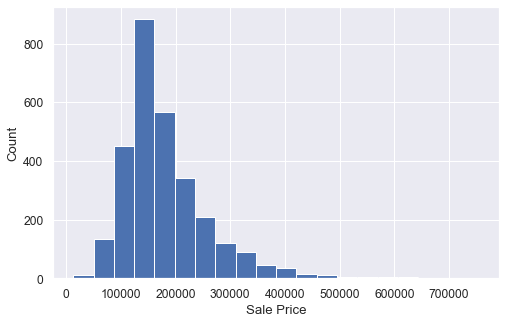

In [22]:
import seaborn as sns;

sns.set(style='darkgrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(housing['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
            ).set(xlabel='Sale Price', ylabel='Count')

Taking a look at the histogram, we can see that very few houses are priced below 100,000, most of the houses sold between 100,000 and 200,000, and very few houses sold for above 400,000.

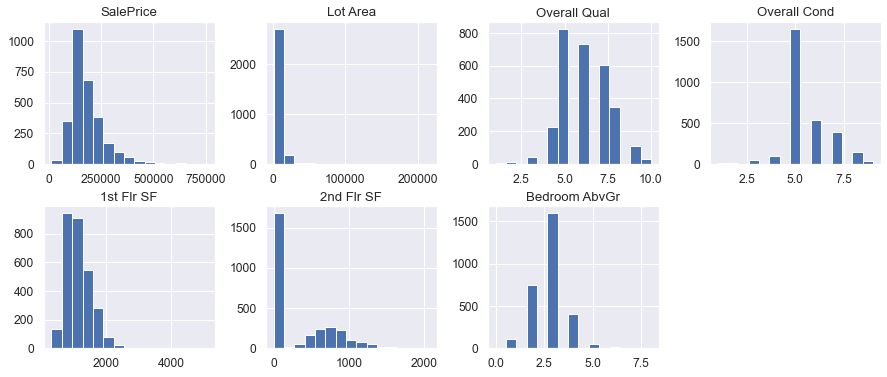

In [23]:
housing[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

We can see that 1stFlrSF (square footage of the first floor) is heavily skewed right, most houses do not have a second floor, and have 3 BedroomAbvGr (bedrooms above ground). Most houses were sold at an OverallCond of 5 and an OverallQual of 5 or higher. The LotArea visual is more difficult to decipher — however we can tell that there is one or more outliers that may need to be removed before any modeling.

## 1.2  Analyzing Categorical Variables

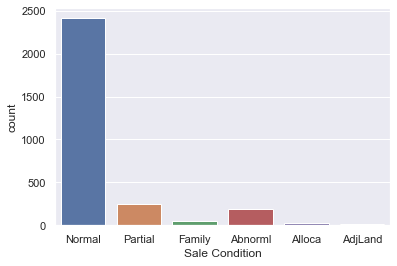

In [28]:
sns.countplot(housing['Sale Condition']);

From the visualization, we can easily see that most houses were sold in Normal condition, and very few were sold in AjdLand (adjoining land purchase), Alloca (allocation: two linked properties with separate deeds), and Family (sale between family members) conditions.

<AxesSubplot:xlabel='MS Zoning', ylabel='count'>

<AxesSubplot:xlabel='Lot Shape', ylabel='count'>

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

<AxesSubplot:xlabel='Central Air', ylabel='count'>

<AxesSubplot:xlabel='Sale Condition', ylabel='count'>

<AxesSubplot:xlabel='Mo Sold', ylabel='count'>

<AxesSubplot:xlabel='Yr Sold', ylabel='count'>

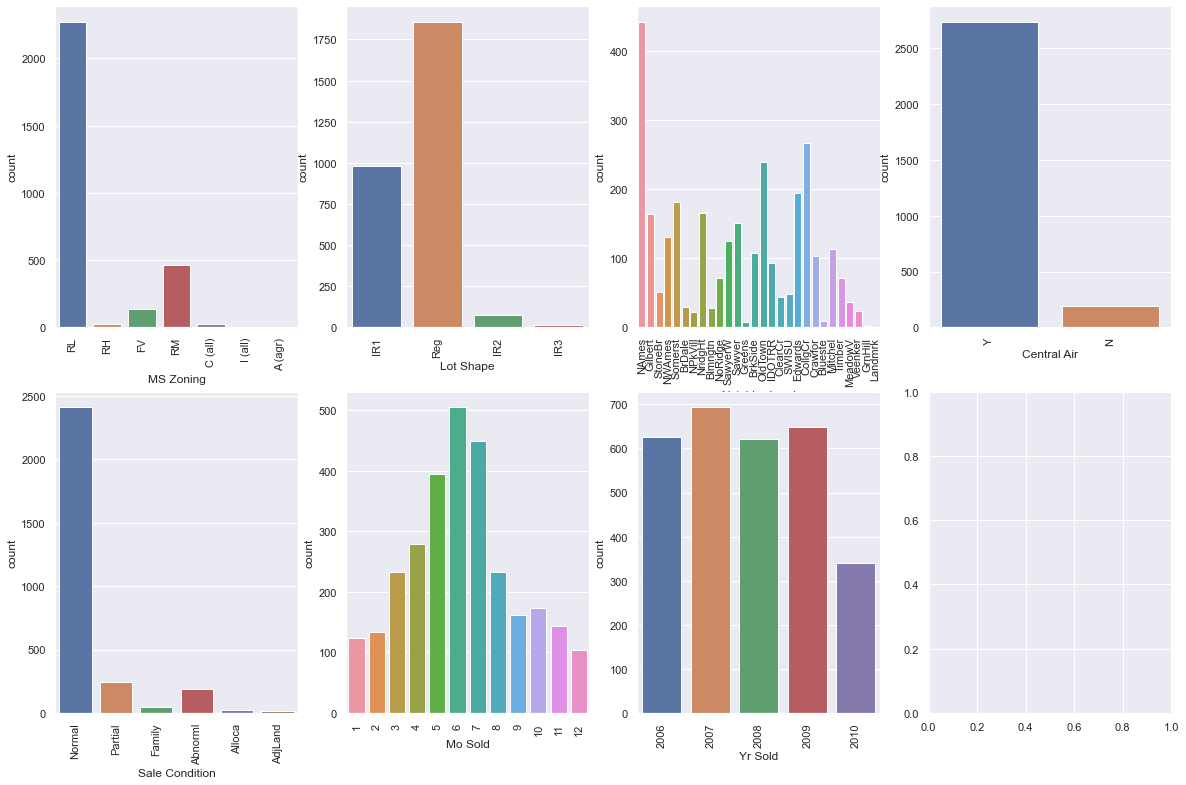

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(20, 13))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

As with our numerical variable histograms, we can gather lots of information from this visual — most houses have RL (Residential Low Density) zoning classification, have Regular lot shape, and have CentralAir. We can also see that houses were sold more frequently during the summer months, the most houses were sold in the NAmes (North Ames) neighborhood, and there was a dip in sale in 2010.

<font color= 'red'> Why was a dip in sale in 2010? 

In [34]:
def summary(df) :
    tf = pd.DataFrame({'데이터크기' : df.shape[0],
                       '데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측비율(%)' : (df.isnull().sum()/len(df)).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [35]:
summary(housing[housing['Yr Sold'] == 2010])

,데이터크기,데이터형태(dtypes),결측치 수(null),결측비율(%),고유값 수(nunique)
SalePrice,341,int64,0,0.0,253
Lot Area,341,int64,0,0.0,304
Overall Qual,341,int64,0,0.0,8
Overall Cond,341,int64,0,0.0,9
1st Flr SF,341,int64,0,0.0,270
2nd Flr SF,341,int64,0,0.0,124
Bedroom AbvGr,341,int64,0,0.0,7
MS Zoning,341,object,0,0.0,5
Lot Shape,341,object,0,0.0,3
Neighborhood,341,object,0,0.0,25


In [36]:
housing[housing['Yr Sold'] == 2010]['Mo Sold'].value_counts()

6    82
5    79
4    72
3    48
2    26
1    26
7     8
Name: Mo Sold, dtype: int64

In [39]:
housing[housing['Yr Sold'] == 2010].groupby('Mo Sold')['Yr Sold'].count()

Mo Sold
1    26
2    26
3    48
4    72
5    79
6    82
7     8
Name: Yr Sold, dtype: int64

# 2. Two variable analysis

## 2.1 Analyzing Relationships Between Numerical Variables

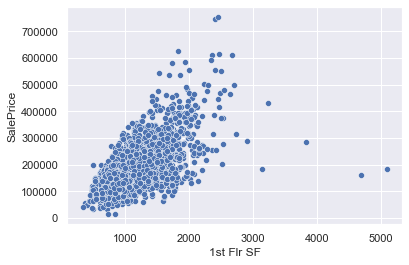

In [45]:
sns.scatterplot(x=housing['1st Flr SF'], y=housing['SalePrice']);

From the scatter plot, we see here that we have a positive relationship between the 1stFlrSF of the house and the SalePrice of the house. In other words, the larger the first floor of a house, the higher the likely sale price.

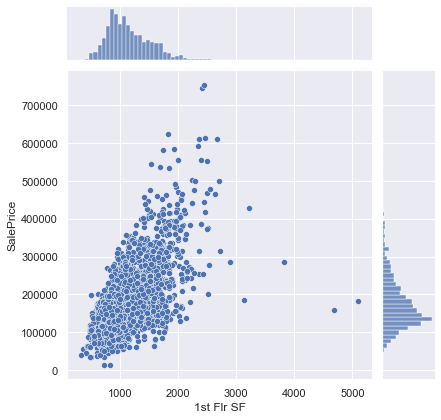

In [46]:
sns.jointplot(x=housing['1st Flr SF'], y=housing['SalePrice']);

## 2.2 Analyzing Relationships Between Numerical and Categorical Variables

<AxesSubplot:xlabel='MS Zoning', ylabel='SalePrice'>

<AxesSubplot:xlabel='Lot Shape', ylabel='SalePrice'>

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

<AxesSubplot:xlabel='Central Air', ylabel='SalePrice'>

<AxesSubplot:xlabel='Sale Condition', ylabel='SalePrice'>

<AxesSubplot:xlabel='Mo Sold', ylabel='SalePrice'>

<AxesSubplot:xlabel='Yr Sold', ylabel='SalePrice'>

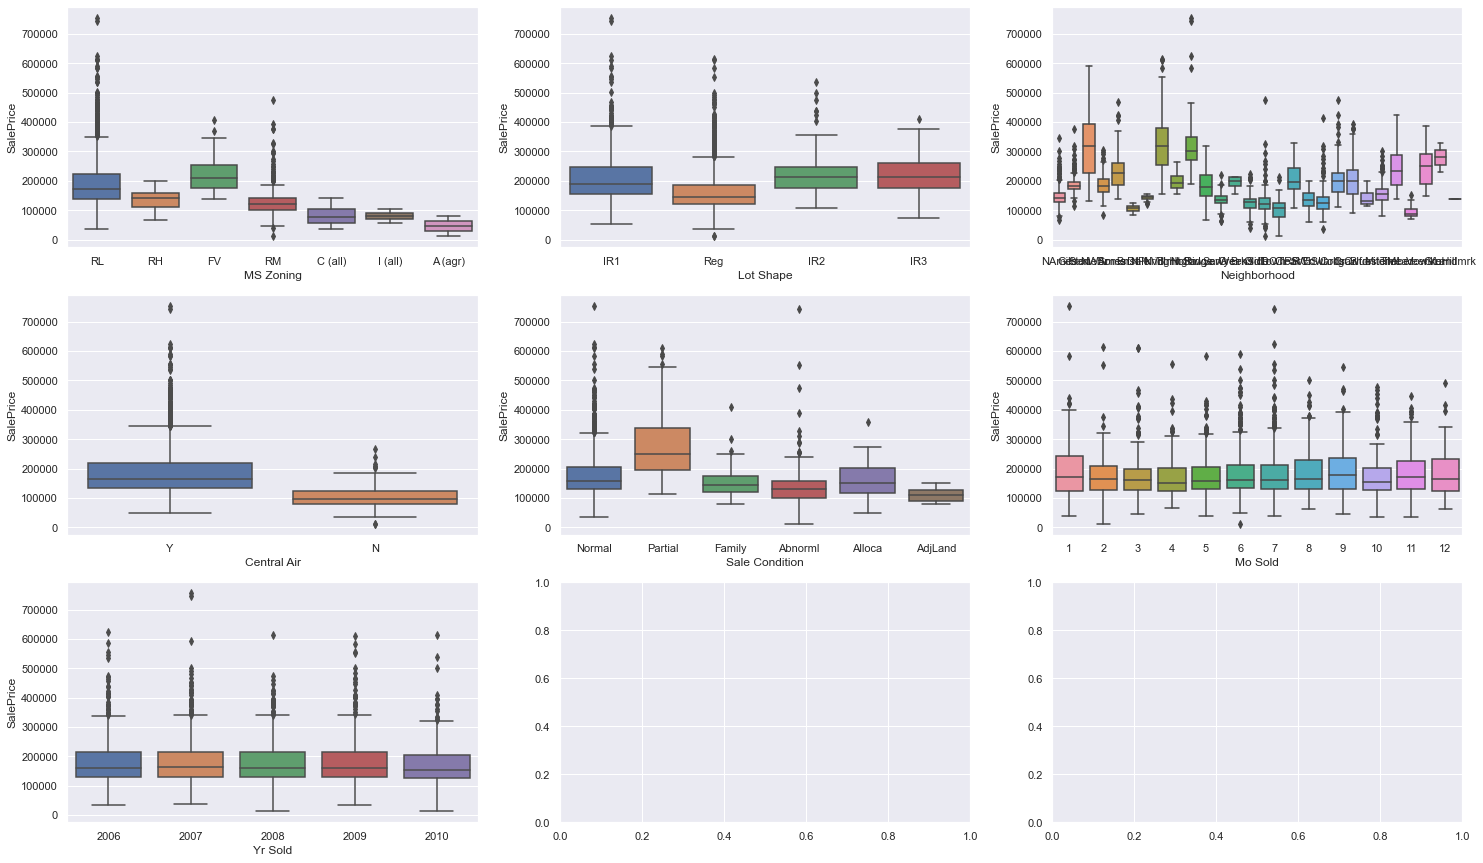

In [49]:
fig, ax = plt.subplots(3, 3, figsize=(25, 15))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)

We can see that houses with FV (Floating Village Residential) zoning classification have a higher average SalePrice than other zoning classifications, as do houses with CentralAir, and houses with a Partial (home not completed when last assessed) SaleCondition. We can also see that there is little variance in average SalePrice between houses with different LotShapes, or between MoSold and YrSold.

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

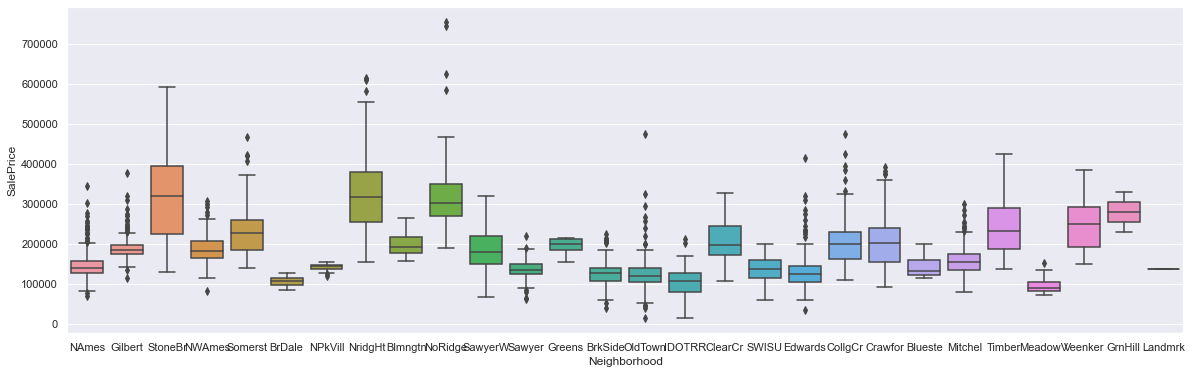

In [55]:
plt.figure(figsize=[20,6])
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing)

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

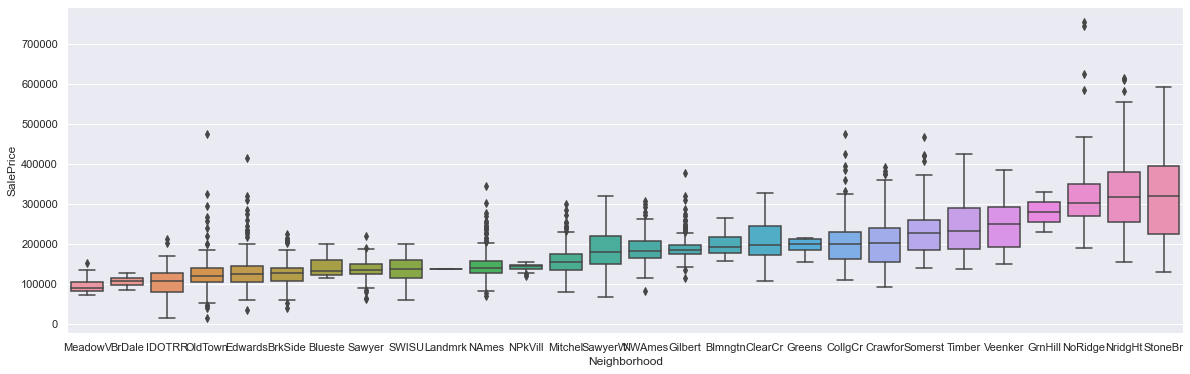

In [53]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
plt.figure(figsize=[20,6])
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))

This figure gives us a lot of information. We can see that in the cheapest neighborhoods houses sell for a median price of around 100,000 USD, and in the most expensive neighborhoods houses sell for around 300,000 USD. We can also see that for some neighborhoods, dispersion between the prices is very low, meaning that all the prices are close to each other. In the most expensive neighborhood NridgHt, however, we see a large box — there is large dispersion in the distribution of prices.

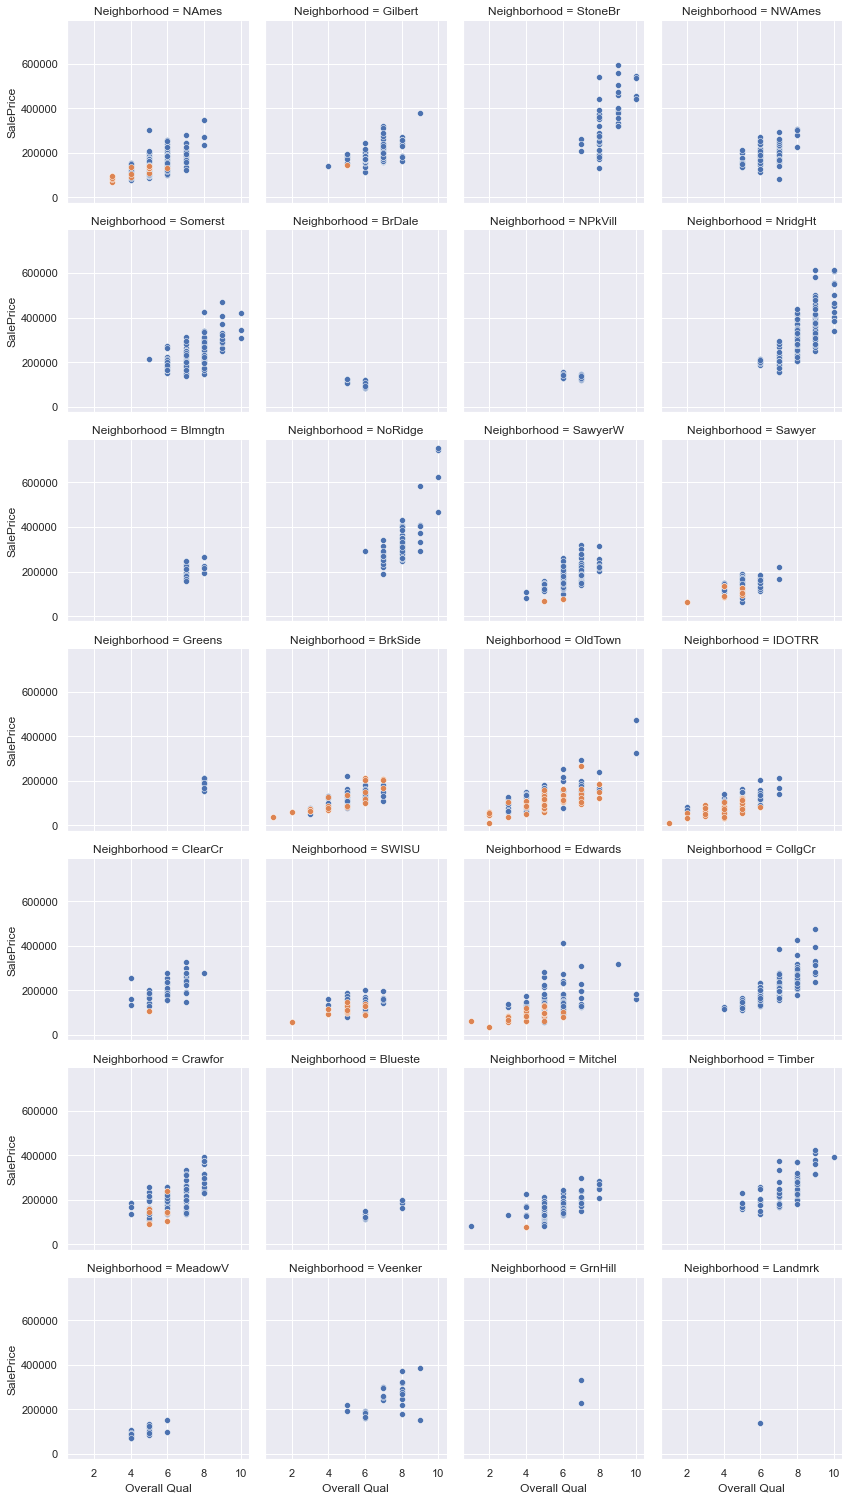

In [56]:
cond_plot = sns.FacetGrid(data=housing, col='Neighborhood', hue='Central Air', col_wrap=4)
cond_plot.map(sns.scatterplot, 'Overall Qual', 'SalePrice');

- Finally, seaborn also allows us to create plots that show conditional relationships. For example, if we are conditioning on the Neighborhood, using the FacetGrid function we can visualize a scatter plot between the OverallQual and the SalePrice variables:

- The FacetGrid method makes it incredibly easy to produce complex visualizations and to get valuable information. It is good practice to produce these visualizations to get quick insights about variable relationships.